<a href="https://colab.research.google.com/github/Maucho6340/Telecom_X_LATAM/blob/main/Challenge_CHRUN_COLAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **CHRUN DE CLIENTES**

URL: https://github.com/alura-cursos/challenge2-data-science-LATAM/blob/main/TelecomX_Data.json

In [49]:
# Cargar los datos
import pandas as pd
import requests

# Origen en GitHub
url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"

# Descarga datos desde la URL Github
response = requests.get(url)
data = response.json()  # Convertir JSON a diccionario o lista de Python

# Crea el DataFrame
df = pd.DataFrame(data)
df.head(10)

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
5,0013-MHZWF,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
6,0013-SMEOE,No,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Two year', 'PaperlessBilling': '..."
7,0014-BMAQU,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Two year', 'PaperlessBilling': '..."
8,0015-UOCOJ,No,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
9,0016-QLJIS,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [50]:
# Expandir columnas con datos anidados
df_customer = pd.json_normalize(df['customer'])  # Información del cliente
df_phone = pd.json_normalize(df['phone'])  # Datos del servicio telefónico
df_internet = pd.json_normalize(df['internet'])  # Información del servicio de internet
df_account = pd.json_normalize(df['account'])  # Datos del contrato y pagos

# Combinar todo en un DataFrame final
df_final = pd.concat([df[['customerID', 'Churn']], df_customer, df_phone, df_internet, df_account], axis=1)

df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [51]:
# Convertir tipos de datos
# Convertir columnas numéricas
df_final['Charges.Total'] = pd.to_numeric(df_final['Charges.Total'], errors='coerce')

# Convertir variables categóricas a 'category' para optimizar memoria
categorical_cols = ['Churn', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                    'PaperlessBilling', 'PaymentMethod']

df_final[categorical_cols] = df_final[categorical_cols].astype('category')

# Convertir `SeniorCitizen` a booleano
df_final['SeniorCitizen'] = df_final['SeniorCitizen'].astype(bool)

# Verificar cambios
print(df_final.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7267 non-null   object  
 1   Churn             7267 non-null   category
 2   gender            7267 non-null   category
 3   SeniorCitizen     7267 non-null   bool    
 4   Partner           7267 non-null   category
 5   Dependents        7267 non-null   category
 6   tenure            7267 non-null   int64   
 7   PhoneService      7267 non-null   category
 8   MultipleLines     7267 non-null   category
 9   InternetService   7267 non-null   category
 10  OnlineSecurity    7267 non-null   category
 11  OnlineBackup      7267 non-null   category
 12  DeviceProtection  7267 non-null   category
 13  TechSupport       7267 non-null   category
 14  StreamingTV       7267 non-null   category
 15  StreamingMovies   7267 non-null   category
 16  Contract          7267 n

In [64]:
# Renombrar las columnas

# Descarga diccionarioimport requests

# URL del diccionario de nombres de columnas
url_diccionario = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_diccionario.md"

# Descargar el contenido del archivo
response = requests.get(url_diccionario)
diccionario_texto = response.text

# Mostrar una vista previa del contenido
print(diccionario_texto[:2000])  # Ver los primeros 500 caracteres

#### Diccionario de datos

- `customerID`: número de identificación único de cada cliente
- `Churn`: si el cliente dejó o no la empresa
- `gender`: género (masculino y femenino)
- `SeniorCitizen`: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
- `Partner`: si el cliente tiene o no una pareja
- `Dependents`: si el cliente tiene o no dependientes
- `tenure`: meses de contrato del cliente
- `PhoneService`: suscripción al servicio telefónico
- `MultipleLines`: suscripción a más de una línea telefónica
- `InternetService`: suscripción a un proveedor de internet
- `OnlineSecurity`: suscripción adicional de seguridad en línea
- `OnlineBackup`: suscripción adicional de respaldo en línea
- `DeviceProtection`: suscripción adicional de protección del dispositivo
- `TechSupport`: suscripción adicional de soporte técnico, menor tiempo de espera
- `StreamingTV`: suscripción de televisión por cable
- `StreamingMovies`: suscripción de streaming de películas
- `Contract`: t

In [77]:
# Definir nombres de columnas
diccionario_abreviado = {
    "customerID": "ID",
    "Churn": "Cancela",
    "gender": "Gen",
    "SeniorCitizen": "Edad_65+",
    "Partner": "Pareja",
    "Dependents": "Dep",
    "tenure": "Meses",
    "PhoneService": "Tel",
    "MultipleLines": "MultiLine",
    "InternetService": "Internet",
    "OnlineSecurity": "Seguridad",
    "OnlineBackup": "Backup",
    "DeviceProtection": "Protección",
    "TechSupport": "Soporte",
    "StreamingTV": "TV",
    "StreamingMovies": "Películas",
    "Contract": "Contrato",
    "PaperlessBilling": "Fact_Elec",
    "PaymentMethod": "Pago",
    "Charges.Monthly": "Pago_Mensual",
    "Charges.Total": "Pago_Total"
}

# Aplicar cambios al DataFrame asegurando que los nombres sean exactos
df_final.rename(columns=diccionario_abreviado, inplace=True)

# Verificar nombres de columnas actualizados
print(df_final.columns)

Index(['ID', 'Cancela', 'Gen', 'Edad_65+', 'Pareja', 'Dep', 'Meses', 'Tel',
       'MultiLine', 'Internet', 'Seguridad', 'Backup', 'Protección', 'Soporte',
       'TV', 'Películas', 'Contrato', 'Fact_Elec', 'Pago', 'Pago_Mensual',
       'Pago_Total'],
      dtype='object')


In [78]:
# Validación de integridad
# Ver tipos de datos y valores nulos
print(df_final.info())

# Ver resumen estadístico de las columnas numéricas
print(df_final.describe())

# Ver cantidad de valores nulos en cada columna
print(df_final.isnull().sum())

# Revisar valores únicos en columnas categóricas
categorical_cols = df_final.select_dtypes(include=['category', 'object']).columns
for col in categorical_cols:
    print(f"\nValores únicos en {col}: {df_final[col].unique()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   ID            7267 non-null   object  
 1   Cancela       7267 non-null   category
 2   Gen           7267 non-null   category
 3   Edad_65+      7267 non-null   bool    
 4   Pareja        7267 non-null   category
 5   Dep           7267 non-null   category
 6   Meses         7267 non-null   int64   
 7   Tel           7267 non-null   category
 8   MultiLine     7267 non-null   category
 9   Internet      7267 non-null   category
 10  Seguridad     7267 non-null   category
 11  Backup        7267 non-null   category
 12  Protección    7267 non-null   category
 13  Soporte       7267 non-null   category
 14  TV            7267 non-null   category
 15  Películas     7267 non-null   category
 16  Contrato      7267 non-null   category
 17  Fact_Elec     7267 non-null   category
 18  Pago    

In [79]:
# Normalización de datos numéricos
from sklearn.preprocessing import MinMaxScaler

# Seleccionar columnas numéricas
numeric_cols = df_final.select_dtypes(include=['int64', 'float64']).columns

# Aplicar normalización Min-Max
scaler = MinMaxScaler()
df_final[numeric_cols] = scaler.fit_transform(df_final[numeric_cols])

# Verificar resultado de la normalización
print(df_final.describe())

             Meses  Pago_Mensual   Pago_Total
count  7267.000000   7267.000000  7256.000000
mean      0.449257      0.462389     0.261001
std       0.341275      0.299797     0.261785
min       0.000000      0.000000     0.000000
25%       0.125000      0.170896     0.044014
50%       0.402778      0.517910     0.158343
75%       0.763889      0.712687     0.434630
max       1.000000      1.000000     1.000000


In [80]:
# Revisión valores nulos
print(df_final.isnull().sum())

ID               0
Cancela          0
Gen              0
Edad_65+         0
Pareja           0
Dep              0
Meses            0
Tel              0
MultiLine        0
Internet         0
Seguridad        0
Backup           0
Protección       0
Soporte          0
TV               0
Películas        0
Contrato         0
Fact_Elec        0
Pago             0
Pago_Mensual     0
Pago_Total      11
dtype: int64


In [81]:
# Comparación con total valores no nulos en columna Pago_Total
print(df_final["Pago_Total"].count())

7256


In [83]:
# Elimina valores nulos columna Pago_Total y chequea nuevamente
df_final.dropna(subset=["Pago_Total"], inplace=True)
print(df_final.isnull().sum())

ID              0
Cancela         0
Gen             0
Edad_65+        0
Pareja          0
Dep             0
Meses           0
Tel             0
MultiLine       0
Internet        0
Seguridad       0
Backup          0
Protección      0
Soporte         0
TV              0
Películas       0
Contrato        0
Fact_Elec       0
Pago            0
Pago_Mensual    0
Pago_Total      0
dtype: int64


In [84]:
# Resumen general del DataFrame
print(df_final.describe())  # Resumen de las columnas numéricas
print(df_final.info())  # Información general sobre el DataFrame

             Meses  Pago_Mensual   Pago_Total
count  7256.000000   7256.000000  7256.000000
mean      0.449938      0.462741     0.261001
std       0.341084      0.299759     0.261785
min       0.013889      0.000000     0.000000
25%       0.125000      0.171144     0.044014
50%       0.402778      0.517910     0.158343
75%       0.763889      0.712935     0.434630
max       1.000000      1.000000     1.000000
<class 'pandas.core.frame.DataFrame'>
Index: 7256 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   ID            7256 non-null   object  
 1   Cancela       7256 non-null   category
 2   Gen           7256 non-null   category
 3   Edad_65+      7256 non-null   bool    
 4   Pareja        7256 non-null   category
 5   Dep           7256 non-null   category
 6   Meses         7256 non-null   float64 
 7   Tel           7256 non-null   category
 8   MultiLine     7256 non-null   category


In [85]:
# Distribución de valores categóricos
categorical_cols = df_final.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols:
    print(f"\nDistribución de {col}:")
    print(df_final[col].value_counts())


Distribución de ID:
ID
9995-HOTOH    1
0002-ORFBO    1
0003-MKNFE    1
0004-TLHLJ    1
0011-IGKFF    1
             ..
0018-NYROU    1
0017-IUDMW    1
0017-DINOC    1
0016-QLJIS    1
0015-UOCOJ    1
Name: count, Length: 7256, dtype: int64

Distribución de Cancela:
Cancela
No     5163
Yes    1869
        224
Name: count, dtype: int64

Distribución de Gen:
Gen
Male      3669
Female    3587
Name: count, dtype: int64

Distribución de Pareja:
Pareja
No     3747
Yes    3509
Name: count, dtype: int64

Distribución de Dep:
Dep
No     5086
Yes    2170
Name: count, dtype: int64

Distribución de Tel:
Tel
Yes    6551
No      705
Name: count, dtype: int64

Distribución de MultiLine:
MultiLine
No                  3490
Yes                 3061
No phone service     705
Name: count, dtype: int64

Distribución de Internet:
Internet
Fiber optic    3198
DSL            2483
No             1575
Name: count, dtype: int64

Distribución de Seguridad:
Seguridad
No                     3607
Yes                  

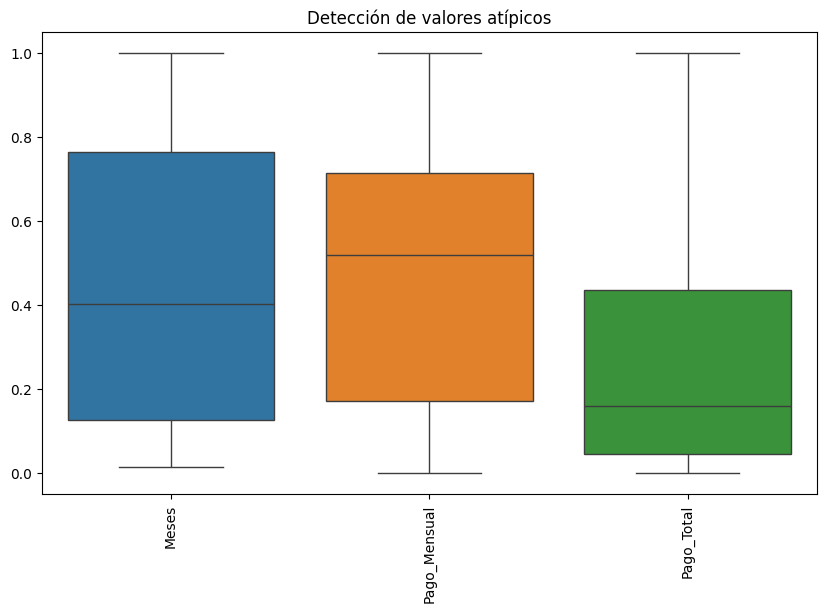

In [86]:
# Identificación de posibles valores atípicos
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = df_final.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(10,6))
sns.boxplot(data=df_final[numeric_cols])
plt.xticks(rotation=90)
plt.title("Detección de valores atípicos")
plt.show()

### **CONCLUSIÓN PARA CADA VARIABLE**
 Meses - Pago_Mensual - Pago_Total

conclusión final sobre el comportamiento de cada variable, basándote en el análisis del box plot:

**Meses:**

La variable "Meses" muestra una distribución de datos relativamente equilibrada y extendida a lo largo de su rango. La mediana se sitúa aproximadamente en el punto medio del recorrido de los datos, indicando que la mitad de las observaciones se encuentran por debajo y la otra mitad por encima de ese valor central. Los datos están distribuidos de manera bastante simétrica, sin una fuerte concentración en ningún extremo, y abarcan todo el rango posible (de 0 a 1, asumiendo una normalización). No se observan valores atípicos evidentes, sugiriendo que la duración en meses es consistente dentro de los límites esperados.

**Pago_Mensual:**

"Pago_Mensual" presenta un comportamiento similar a "Meses" en cuanto a su distribución: es relativamente simétrica y ocupa una buena parte del rango. La mediana se encuentra cercana al centro, lo que implica una distribución equitativa de los pagos mensuales alrededor de este punto. La dispersión de los pagos mensuales (el 50% central de los datos) es considerable, lo que indica una variedad de valores, pero sin que ninguno de ellos se desvíe drásticamente como un valor atípico. Esto sugiere una diversidad en los patrones de pago mensuales, pero dentro de un rango predecible.

**Pago_Total:**

La variable "Pago_Total" exhibe un comportamiento fuertemente sesgado hacia valores bajos, con una concentración significativa de observaciones en el extremo inferior del rango. La mediana es notablemente baja, lo que indica que la gran mayoría de los pagos totales son de pequeña magnitud. A pesar de esta concentración en valores bajos, existe una cola larga y un bigote superior extendido, lo que revela la presencia de algunos "Pago_Total" considerablemente más altos. Este patrón es común en datos financieros donde muchos clientes tienen transacciones pequeñas, pero unos pocos realizan transacciones de gran volumen. Aunque no se marcan puntos atípicos individuales, la distribución general indica que los pagos totales altos son menos frecuentes pero pueden alcanzar valores muy elevados.

In [87]:
# Distribución de cancelaciones
print('|r| ±0.00 - ±0.09: correlación nula.\n|r| ±0.10 - ±0.19: correlación muy debil.\n|r| ±0.20 - ±0.49: correlación debil.\n|r| ±0.50 - ±0.69: correlación moderada.\n|r| ±0.70 - ±0.84: correlación significativa.\n|r| ±0.85 - ±0.95: correlación fuerte.\n|r| ±0.96 - ±1.00: correlación perfecta.')


|r| ±0.00 - ±0.09: correlación nula.
|r| ±0.10 - ±0.19: correlación muy debil.
|r| ±0.20 - ±0.49: correlación debil.
|r| ±0.50 - ±0.69: correlación moderada.
|r| ±0.70 - ±0.84: correlación significativa.
|r| ±0.85 - ±0.95: correlación fuerte.
|r| ±0.96 - ±1.00: correlación perfecta.


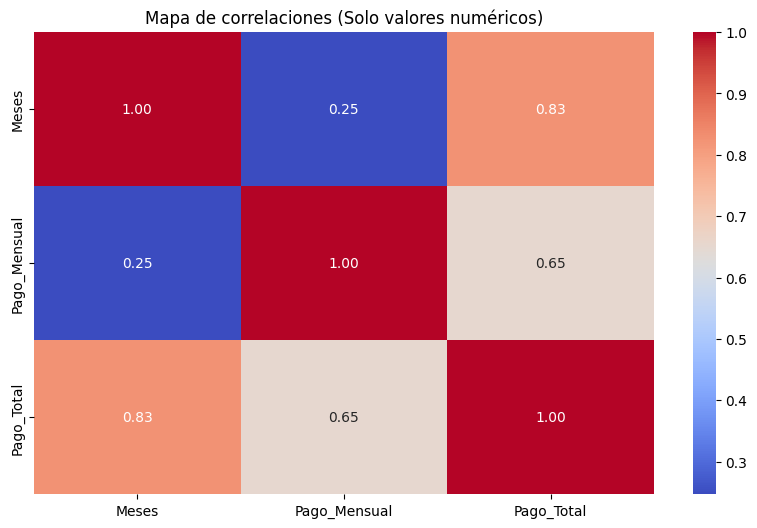

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar solo columnas numéricas
numeric_cols = df_final.select_dtypes(include=['int64', 'float64']).columns
df_corr = df_final[numeric_cols].corr()  # Calcular correlaciones SOLO en valores numéricos

# Graficar mapa de calor
plt.figure(figsize=(10,6))
sns.heatmap(df_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de correlaciones (Solo valores numéricos)")
plt.show()

### **Conclusión del Mapa de Correlaciones**

Conclusión Final del Comportamiento General de las Variables:

En conjunto, este mapa de correlaciones revela que el "Pago_Total" está fuertemente influenciado tanto por la duración del servicio ("Meses") como por el monto del "Pago_Mensual". La variable "Meses" tiene la relación más impactante y directa con el "Pago_Total", lo que sugiere que la antigüedad del cliente es el principal impulsor de la acumulación del pago total. El "Pago_Mensual" también contribuye significativamente al "Pago_Total", aunque en menor medida que la duración. Por otro lado, la relación entre la antigüedad del cliente ("Meses") y su pago mensual ("Pago_Mensual") es la más débil de las tres, lo que implica que el valor del servicio que un cliente elige (reflejado en el pago mensual) no está tan directamente ligado a cuánto tiempo lleva siendo cliente.